# Stock Market Analysis Project 

### Part 0: Import

**Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock 

**obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**



In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [47]:
# start = datetime.datetime(2012, 1, 1)
# end = datetime.datetime(2017, 1, 1)
# tesla = web.DataReader("TSLA", 'google', start, end)
tesla = pd.read_csv('Tesla_Stock.csv')
tesla = tesla[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
tesla = tesla.set_index('Date')
tesla.index = pd.to_datetime(tesla.index)

In [48]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [49]:
tesla.to_csv('Tesla_Stock.csv')

### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [50]:
ford = pd.read_csv('Ford_Stock.csv')
ford = ford[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
ford = ford.set_index('Date')
ford.index = pd.to_datetime(ford.index)

gm = pd.read_csv('GM_Stock.csv')
gm = gm[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
gm = gm.set_index('Date')
gm.index = pd.to_datetime(gm.index)
# ford = web.DataReader("F", 'google', start, end)
# gm = web.DataReader("GM",'google',start,end)

In [51]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [52]:
ford.to_csv('Ford_Stock.csv')

In [53]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


In [54]:
gm.to_csv('GM_Stock.csv')

## Part 2: Visualizing the Data

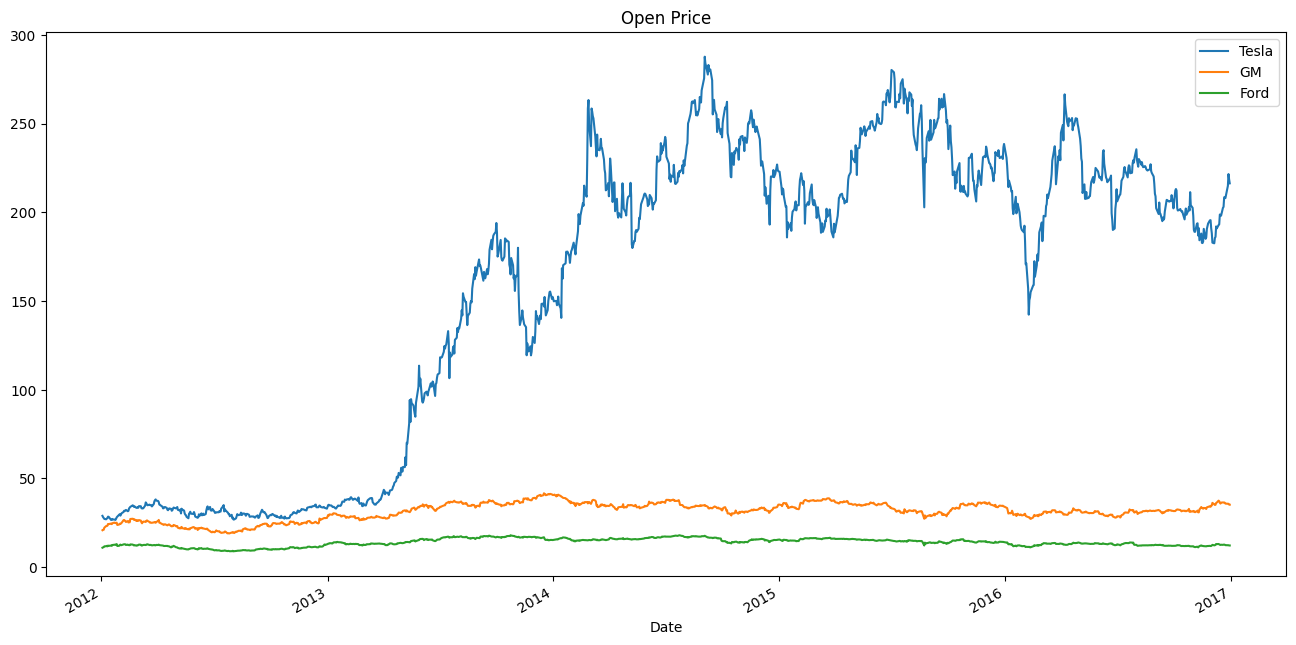

In [55]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

____

**Plot the Volume of stock traded each day.**

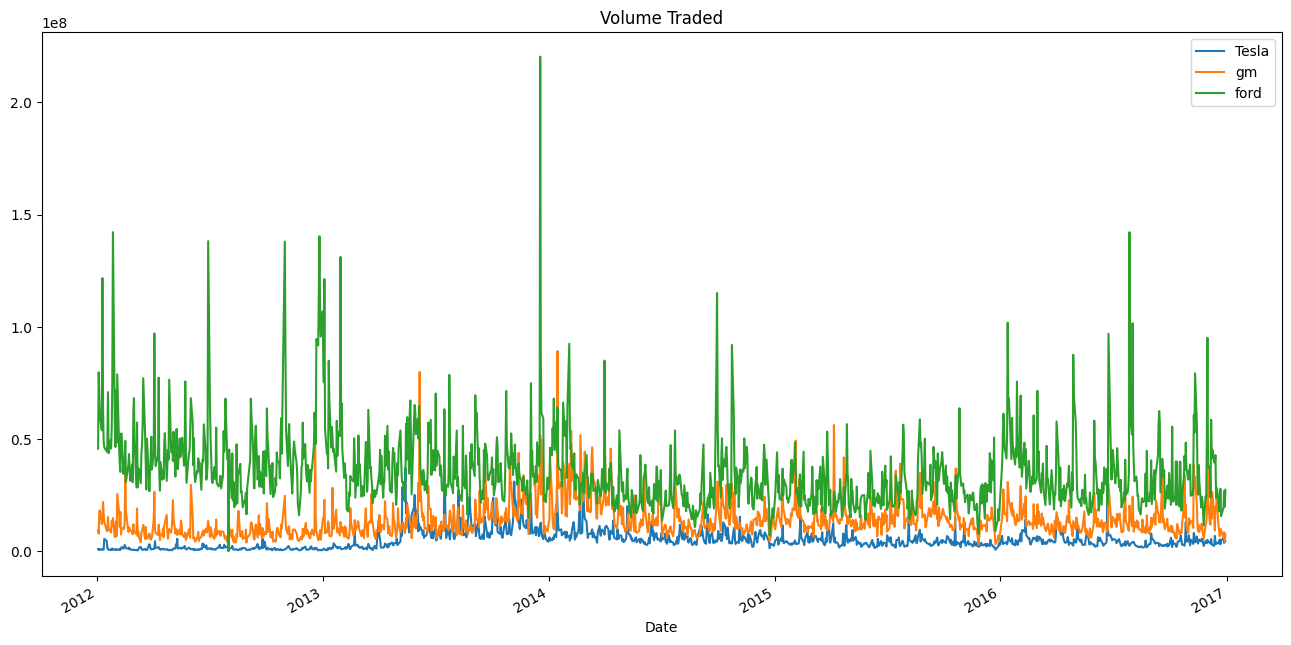

In [56]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

In [57]:
ford['Volume'].argmax()

493

____

The Open Price Time Series Visualization provides us with a fascinating insight into the relative value of Tesla when compared to GM and Ford. Upon closer inspection, it seems that Tesla has always been more valuable as a company when compared to its counterparts. However, there is more to this story than just the stock price. To gain a deeper understanding of a company's worth, we would need to consider its total market cap. This encompasses not just the stock price, but also the total number of units of stock present.

Regrettably, our current data does not provide us with information on the total units of stock for each company. Nevertheless, we can use a simple calculation to estimate the total amount of money being traded around. This calculation involves multiplying the Volume column by the Open price. By doing this, we can arrive at a rough estimate of the total amount of money traded for each company.

It's important to note that this is still not the actual market cap. However, it is a visual representation of the total amount of money being traded around using the time series. For example, suppose we have 100 units of stock at $10 each and 100,000 units of stock at $1 each. In that case, the total amount of money traded for the first scenario would be $1,000, while the second scenario would be $100,000. As we can see, the total amount of money traded is not directly proportional to the stock price or the number of units of stock present.

Overall, while the Open Price Time Series Visualization provides us with valuable insights into the relative value of different companies, it is crucial to consider the total market cap to get a complete understanding of a company's worth. By using a simple calculation to estimate the total amount of money being traded around, we can get a rough idea of a company's value, but it is important to remember that this is only an estimate, and the actual market cap may differ significantly from this.

In [58]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Text(0, 0.5, 'Total Traded')

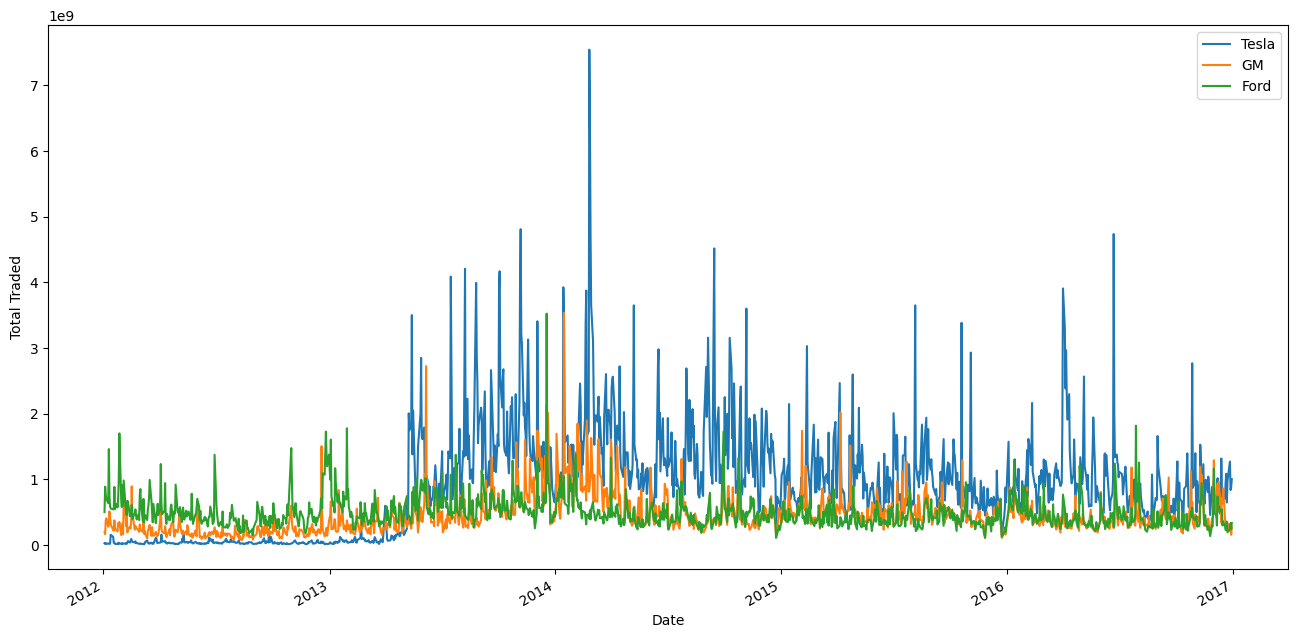

In [59]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

It looks like there was huge amount of money traded for Tesla somewhere in early 2014.

In [60]:
tesla['Total Traded'].argmax()

538

____

 plotting out some MA (Moving Averages). 

<AxesSubplot: xlabel='Date'>

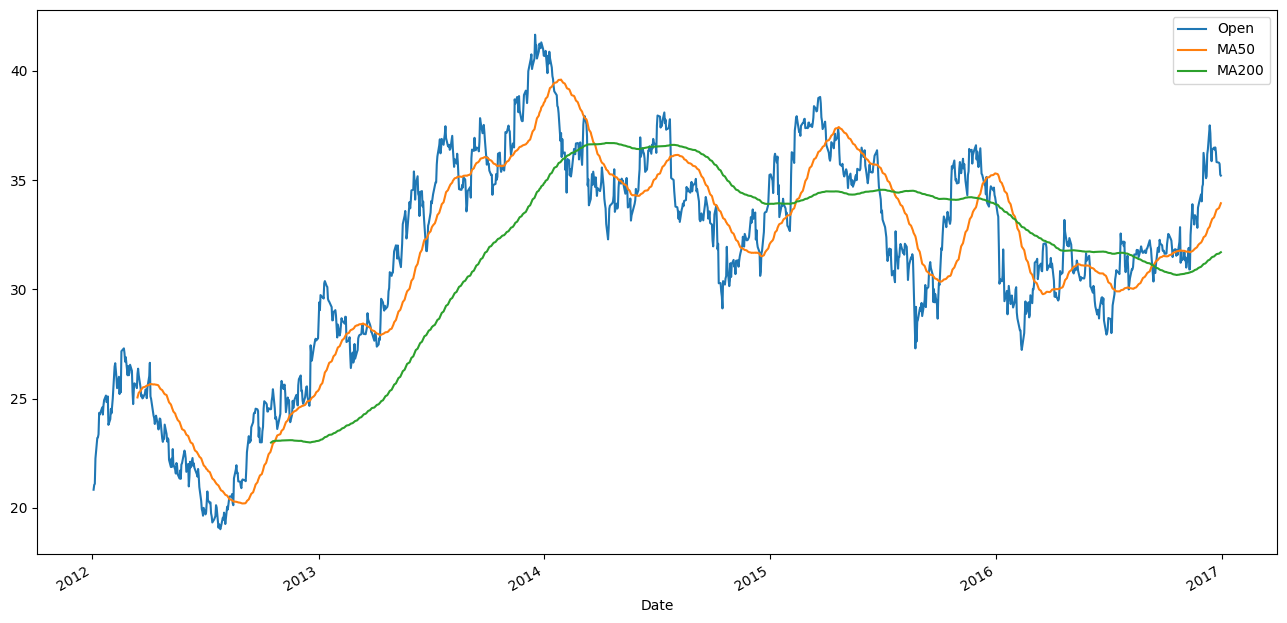

In [61]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

______

In [62]:
from pandas.plotting import scatter_matrix

In [63]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [64]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

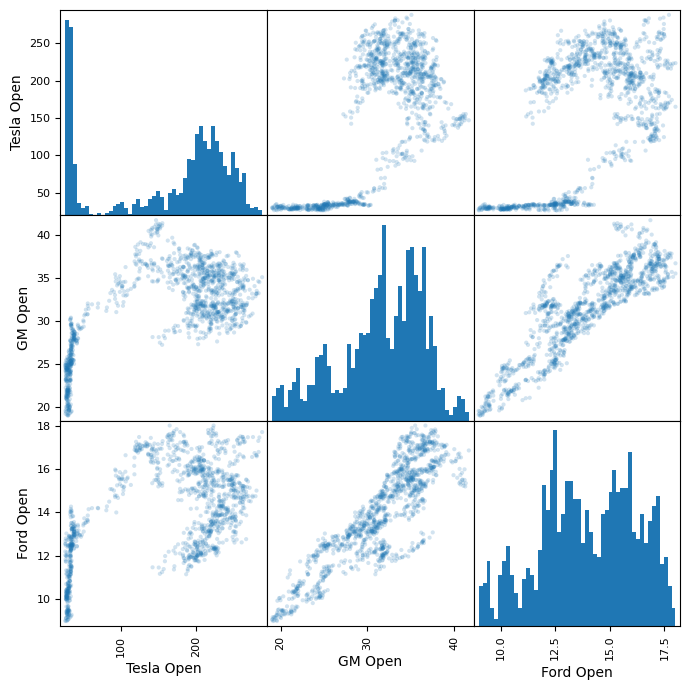

In [65]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


**a CandleStick chart for Ford in January 2012**

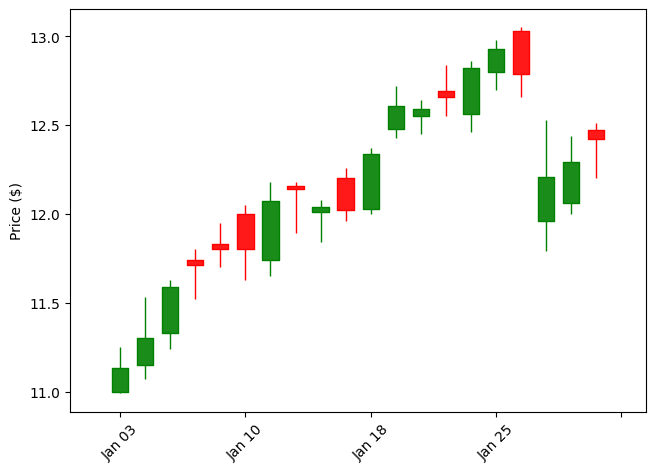

In [67]:
import mplfinance as mpf
import pandas as pd

# Assuming 'ford' is your DataFrame with stock data
ford_subset = ford.loc['2012-01':'2012-01']

# Create a custom style for the plot
mc = mpf.make_marketcolors(up='g', down='r', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)

# Configure the plot settings
kwargs = dict(type='candle', ylabel='Price ($)', style=s)

# Plot the candlestick chart
mpf.plot(ford_subset, **kwargs)


____
# Part 3: Financial Analysis


## Daily Percentage Change
First calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [68]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [69]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [70]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [71]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [72]:
# Now repeat for the other dataframes
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [73]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [74]:
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

<AxesSubplot: >

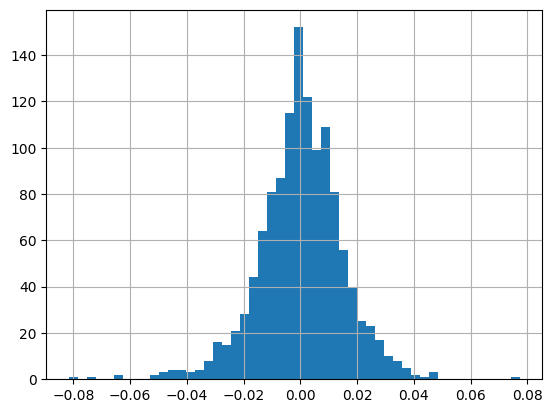

In [75]:
ford['returns'].hist(bins=50)

<AxesSubplot: >

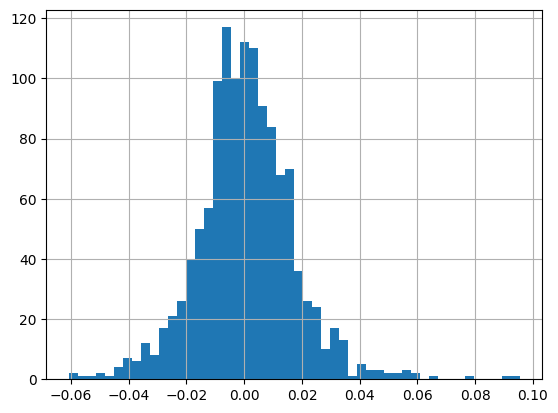

In [76]:
gm['returns'].hist(bins=50)

<AxesSubplot: >

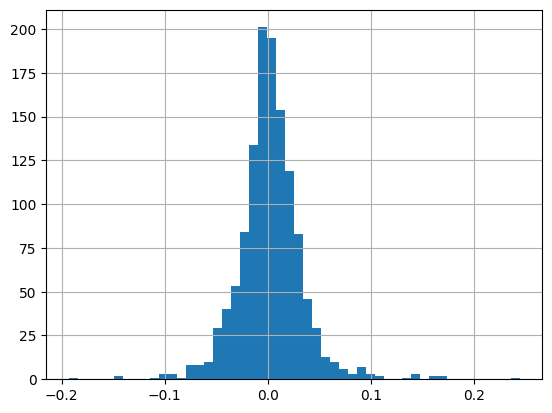

In [77]:
tesla['returns'].hist(bins=50)

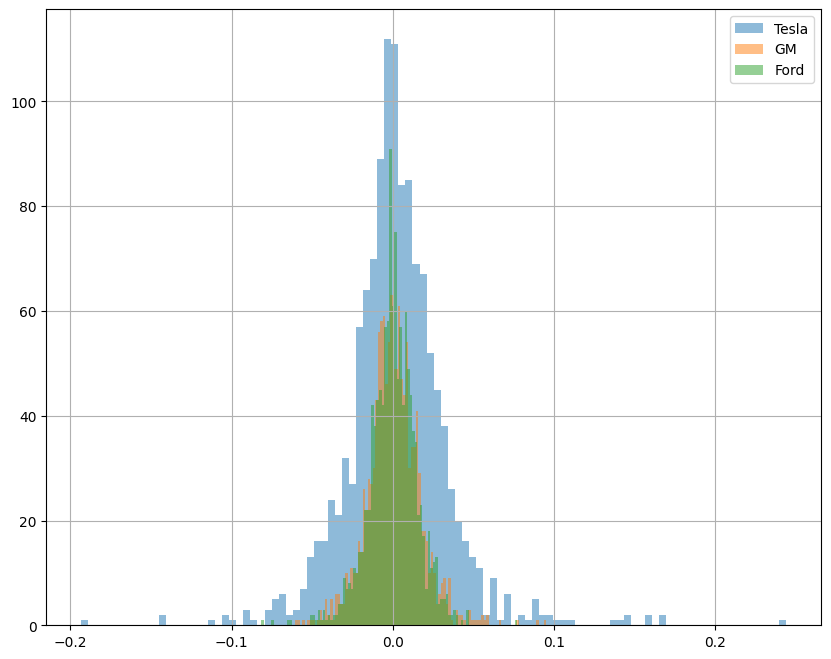

In [78]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

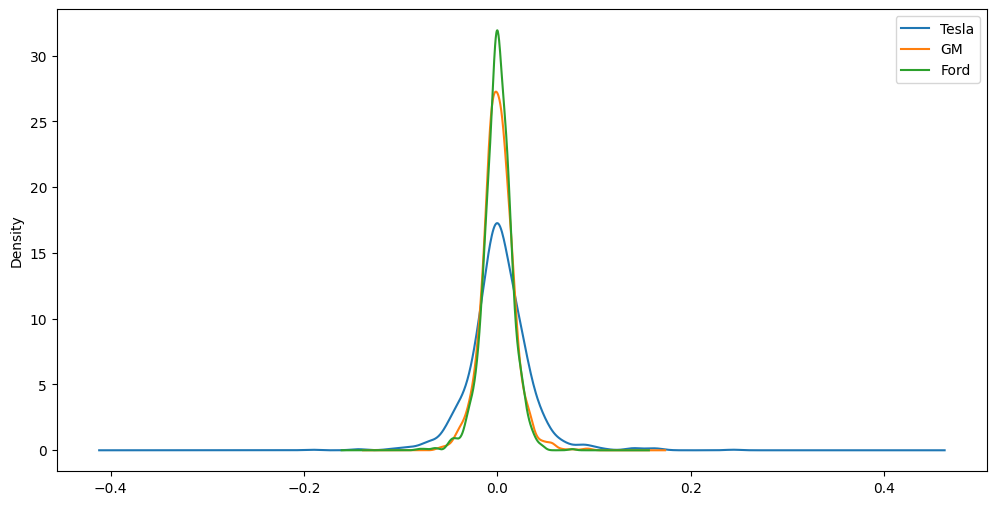

In [79]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

<AxesSubplot: >

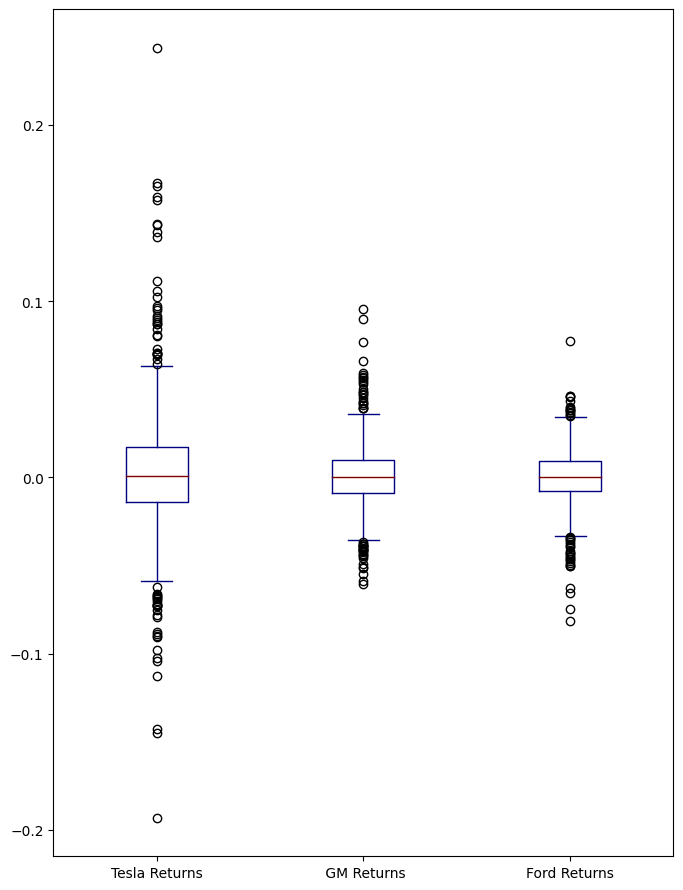

In [80]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks


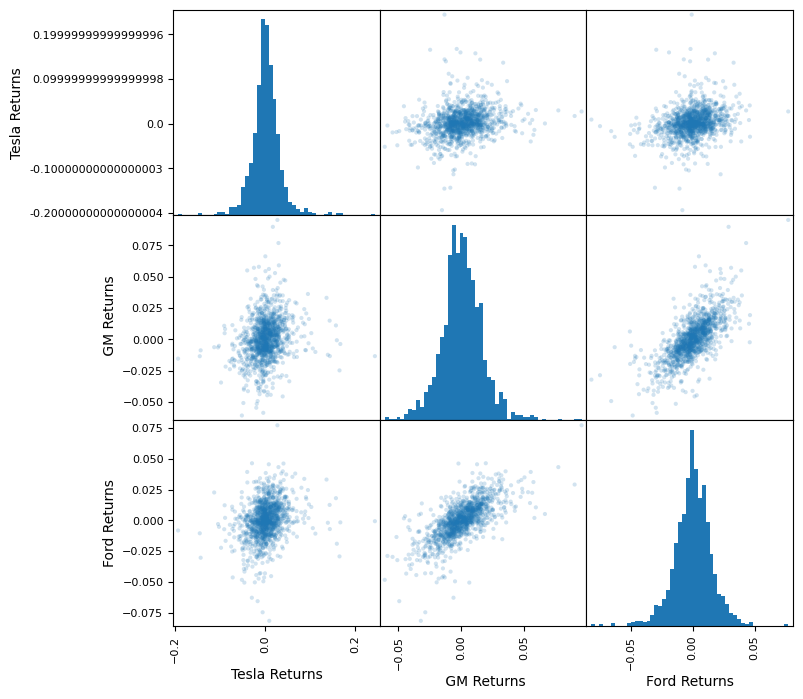

In [81]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot: xlabel=' GM Returns', ylabel='Ford Returns'>

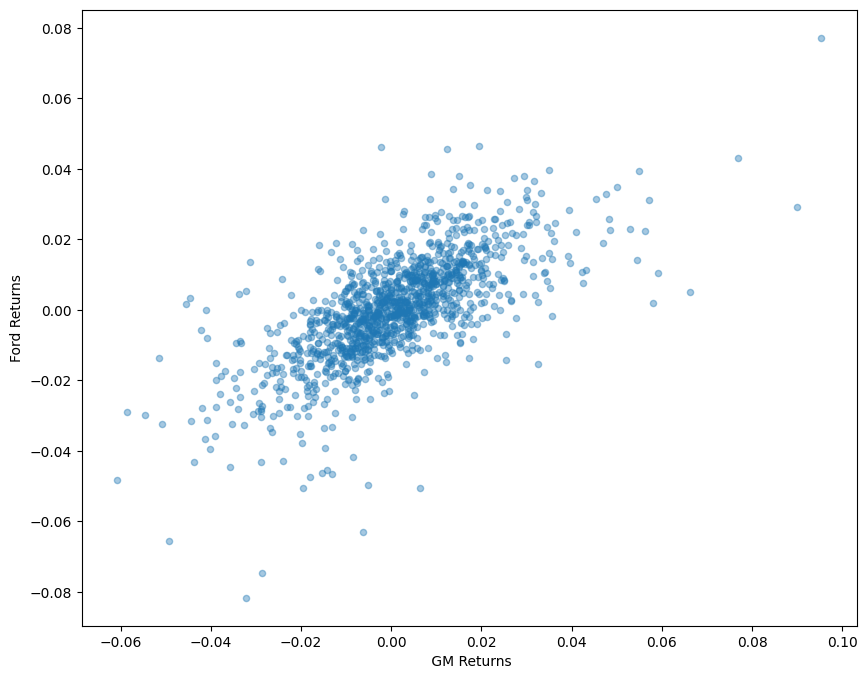

In [82]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

____
## Cumulative Daily Returns


So there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**:

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [83]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [84]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [85]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

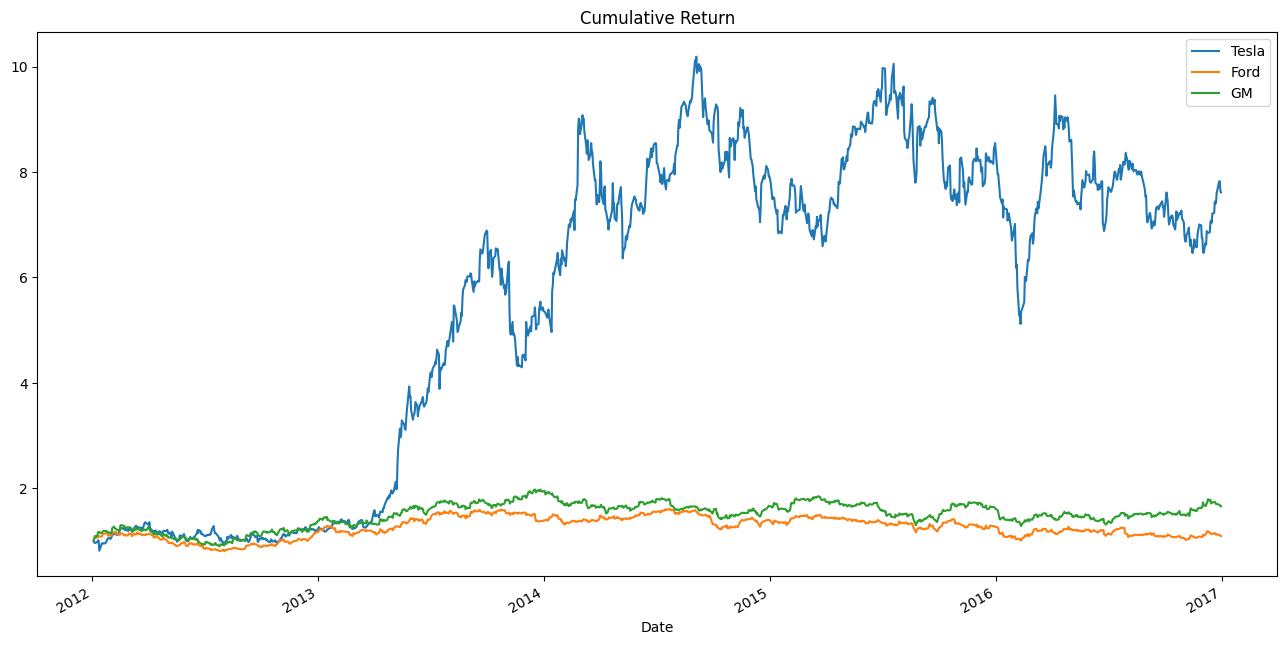

In [86]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()